In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons
#Using the make_moons dataset which is difficult for the likes of k means clustering

In [4]:
X,Y = make_blobs(n_samples=500, centers=2,n_features=2,random_state=1)
print(X.shape,Y.shape)

(500, 2) (500,)


In [5]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))
#Writing the sigmoid function 

In [7]:
def predict(X,weights):
    #X -> mx(n+1) matrix, w -->(nX1,) vector
    z = np.dot(X,weights) # z = Xi * wi
    predictions = sigmoid(z) # predictions = Putting value of z in sigmoid function
    return predictions

def loss(X,Y,weights):
    #Binary Cross Entropy
    y_ = predict(X,weights) #Computing the value of Y
    cost = np.mean(-Y*np.log(y_) - (1-Y)*np.log(1-y_)) #Computing the loss for each row and taking the mean
    return cost

def updateweight(X,Y,weights,learning_rate):
    #Perform weight updates for 1 epoch
    y_ = predict(X,weights) #Computing the expected value
    dw = np.dot(X.T,y_ - Y) #Computing dj/dw
    
    m = X.shape[0] #Total number
    weights = weights - learning_rate*dw/(float(m)) #W = w-learning*(dw/total number of items)
    return weights #We will get updated weights

def train(X,Y,learning_rate=0.5,maxEpochs=1000):
    
    #Modify the input to handle the bias term
    ones = np.ones((X.shape[0],1)) #To append a column of ones which can be used as bias
    X = np.hstack((ones,X)) #Appending to our dataset
    
    #Init Weights 0
    weights = np.zeros(X.shape[1]) #n+1 features including the bias
    
    
    #Iterate over all epochs and make updates
    
    for epoch in range(maxEpochs):
        
        weights = updateweight(X,Y,weights,learning_rate) #The weight will keep on updating
        
        if epoch%5==0:
            l = loss(X,Y,weights) #Will compute and show loss for every 5th epoch
            print("Epoch %d Loss %.6f"%(epoch,l)) #One space after epoch and will show loss value upto six decimal places
    return weights




In [20]:
weights = train(X,Y,learning_rate=0.6,maxEpochs = 500)

Epoch 0 Loss 0.047046
Epoch 5 Loss 0.016685
Epoch 10 Loss 0.010001
Epoch 15 Loss 0.007059
Epoch 20 Loss 0.005427
Epoch 25 Loss 0.004398
Epoch 30 Loss 0.003694
Epoch 35 Loss 0.003185
Epoch 40 Loss 0.002800
Epoch 45 Loss 0.002499
Epoch 50 Loss 0.002258
Epoch 55 Loss 0.002060
Epoch 60 Loss 0.001895
Epoch 65 Loss 0.001755
Epoch 70 Loss 0.001636
Epoch 75 Loss 0.001532
Epoch 80 Loss 0.001442
Epoch 85 Loss 0.001362
Epoch 90 Loss 0.001291
Epoch 95 Loss 0.001227
Epoch 100 Loss 0.001170
Epoch 105 Loss 0.001119
Epoch 110 Loss 0.001072
Epoch 115 Loss 0.001029
Epoch 120 Loss 0.000990
Epoch 125 Loss 0.000954
Epoch 130 Loss 0.000921
Epoch 135 Loss 0.000890
Epoch 140 Loss 0.000862
Epoch 145 Loss 0.000835
Epoch 150 Loss 0.000811
Epoch 155 Loss 0.000788
Epoch 160 Loss 0.000766
Epoch 165 Loss 0.000746
Epoch 170 Loss 0.000727
Epoch 175 Loss 0.000710
Epoch 180 Loss 0.000693
Epoch 185 Loss 0.000677
Epoch 190 Loss 0.000662
Epoch 195 Loss 0.000648
Epoch 200 Loss 0.000634
Epoch 205 Loss 0.000622
Epoch 210 Loss

In [19]:
def getPredictions(X_Test,weights,labels=True):
    if X_Test.shape[1] != weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1)) #Take for bias
        X_Test = np.hstack((ones,X_Test)) #Same number of features as weights and bias

    probs = predict(X_Test,weights) #Will give a prediction
    
    if not labels: #If we don't want labels it will return a list of probabilities
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [23]:
x1 = np.linspace(-12,2,10) #Will draw a line from -2 to 2 with 10 different data points
x2 = -(weights[0] + weights[1]*x1)/weights[2] #Simply equation of line

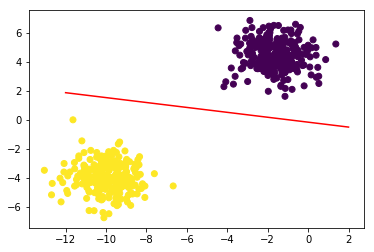

In [24]:
plt.scatter(X[:,0],X[:,1],c=Y) #Plot all the points
plt.plot(x1,x2,c='red') #Draw the line
plt.show()

In [27]:
# Find the accuracy!
y_ = getPredictions(X,weights,labels=True)
accuracy = np.sum(y_==Y)/Y.shape[0]
print(accuracy*100)

100.0


In [28]:
#So let's take more complicated dataset and check performance in that
x,y = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=1)

In [29]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))
#Writing the sigmoid function 


In [30]:
def predict(X,weights):
    #X -> mx(n+1) matrix, w -->(nX1,) vector
    z = np.dot(X,weights) # z = Xi * wi
    predictions = sigmoid(z) # predictions = Putting value of z in sigmoid function
    return predictions

def loss(X,Y,weights):
    #Binary Cross Entropy
    y_ = predict(X,weights) #Computing the value of Y
    cost = np.mean(-Y*np.log(y_) - (1-Y)*np.log(1-y_)) #Computing the loss for each row and taking the mean
    return cost

def updateweight(X,Y,weights,learning_rate):
    #Perform weight updates for 1 epoch
    y_ = predict(X,weights) #Computing the expected value
    dw = np.dot(X.T,y_ - Y) #Computing dj/dw
    
    m = X.shape[0] #Total number
    weights = weights - learning_rate*dw/(float(m)) #W = w-learning*(dw/total number of items)
    return weights #We will get updated weights

def train(X,Y,learning_rate=0.5,maxEpochs=1000):
    
    #Modify the input to handle the bias term
    ones = np.ones((X.shape[0],1)) #To append a column of ones which can be used as bias
    X = np.hstack((ones,X)) #Appending to our dataset
    
    #Init Weights 0
    weights = np.zeros(X.shape[1]) #n+1 features including the bias
    
    
    #Iterate over all epochs and make updates
    
    for epoch in range(maxEpochs):
        
        weights = updateweight(X,Y,weights,learning_rate) #The weight will keep on updating
        
        if epoch%5==0:
            l = loss(X,Y,weights) #Will compute and show loss for every 5th epoch
            print("Epoch %d Loss %.6f"%(epoch,l)) #One space after epoch and will show loss value upto six decimal places
    return weights


In [31]:
Weights = train(X,Y,learning_rate=0.6,maxEpochs = 500)

Epoch 0 Loss 0.047046
Epoch 5 Loss 0.016685
Epoch 10 Loss 0.010001
Epoch 15 Loss 0.007059
Epoch 20 Loss 0.005427
Epoch 25 Loss 0.004398
Epoch 30 Loss 0.003694
Epoch 35 Loss 0.003185
Epoch 40 Loss 0.002800
Epoch 45 Loss 0.002499
Epoch 50 Loss 0.002258
Epoch 55 Loss 0.002060
Epoch 60 Loss 0.001895
Epoch 65 Loss 0.001755
Epoch 70 Loss 0.001636
Epoch 75 Loss 0.001532
Epoch 80 Loss 0.001442
Epoch 85 Loss 0.001362
Epoch 90 Loss 0.001291
Epoch 95 Loss 0.001227
Epoch 100 Loss 0.001170
Epoch 105 Loss 0.001119
Epoch 110 Loss 0.001072
Epoch 115 Loss 0.001029
Epoch 120 Loss 0.000990
Epoch 125 Loss 0.000954
Epoch 130 Loss 0.000921
Epoch 135 Loss 0.000890
Epoch 140 Loss 0.000862
Epoch 145 Loss 0.000835
Epoch 150 Loss 0.000811
Epoch 155 Loss 0.000788
Epoch 160 Loss 0.000766
Epoch 165 Loss 0.000746
Epoch 170 Loss 0.000727
Epoch 175 Loss 0.000710
Epoch 180 Loss 0.000693
Epoch 185 Loss 0.000677
Epoch 190 Loss 0.000662
Epoch 195 Loss 0.000648
Epoch 200 Loss 0.000634
Epoch 205 Loss 0.000622
Epoch 210 Loss

In [32]:
def getPredictions(X_Test,weights,labels=True):
    if X_Test.shape[1] != weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1)) #Take for bias
        X_Test = np.hstack((ones,X_Test)) #Same number of features as weights and bias

    probs = predict(X_Test,weights) #Will give a prediction
    
    if not labels: #If we don't want labels it will return a list of probabilities
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [35]:
X1 = np.linspace(-2,2,10) #Will draw a line from -2 to 2 with 10 different data points
X2 = -(Weights[0] + Weights[1]*x1)/Weights[2] #Simply equation of line

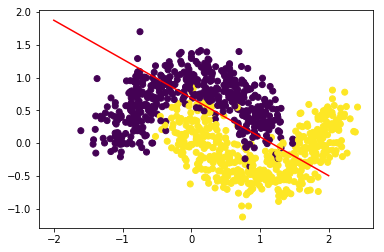

In [36]:
plt.scatter(x[:,0],x[:,1],c=y) #Plot all the points
plt.plot(X1,X2,c='red') #Draw the line
plt.show()

In [37]:
# Find the accuracy!
y_ = getPredictions(x,Weights,labels=True)
accuracy = np.sum(y_==y)/y.shape[0]
print(accuracy*100)

65.60000000000001
